# Figure 6

"process.py" runs sparg on a tree sequence output by SLiM. This generates the random_ancestors_1000_effective_dispersal.csv file which is used to create accuracy plots.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib as mpl
import scipy.stats as st
import tskit
import sparg

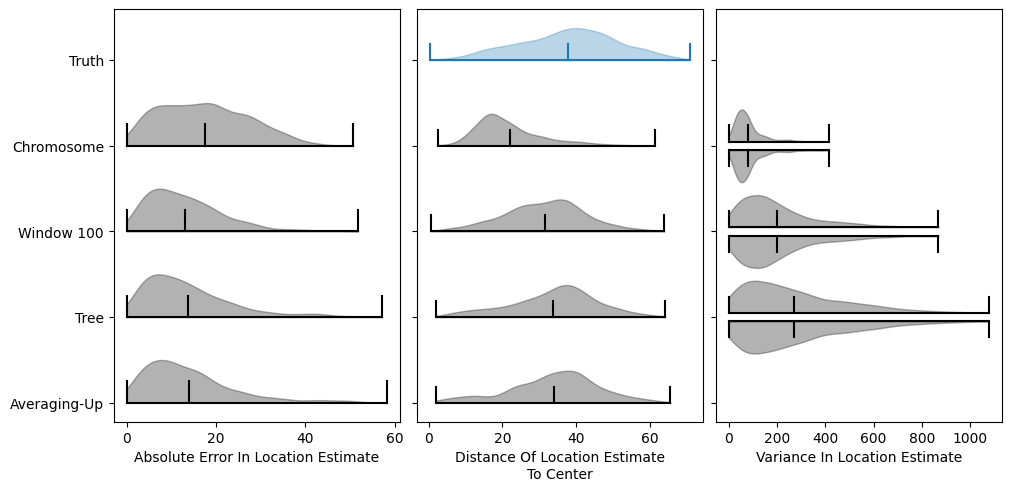

In [2]:
random_ancestors = pd.read_csv("random_ancestors_1000_effective_dispersal.csv")

gap = 0.05

fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, layout="constrained", sharey=True)

vp0 = ax0.violinplot([
    random_ancestors["midpoint_abs_error"],
    random_ancestors["window_0_abs_error"],
    random_ancestors["window_100_abs_error"],
    random_ancestors["arg_abs_error"]
], showmeans=True, vert=False, side="high", widths=1)
ax0.set_xlabel("Absolute Error In Location Estimate")

for partname in ("cbars","cmins","cmaxes","cmeans"):
    vp = vp0[partname]
    vp.set_edgecolor("black")
    
for pc in vp0['bodies']:
    pc.set_color("black")

vp2 = ax1.violinplot([
    random_ancestors["midpoint_dist_to_center"],
    random_ancestors["window_0_dist_to_center"],
    random_ancestors["window_100_dist_to_center"],
    random_ancestors["arg_dist_to_center"]
], showmeans=True, vert=False, side="high", widths=0.75)
vp2_true = ax1.violinplot([
    random_ancestors["true_dist_to_center"]
], showmeans=True, vert=False, side="high", widths=0.75, positions=[5])
ax1.set_xlabel("Distance Of Location Estimate\nTo Center")

for partname in ("cbars","cmins","cmaxes","cmeans"):
    vp2[partname].set_edgecolor("black")
    vp2_true[partname].set_edgecolor("#1f77b4")

for pc in vp2["bodies"]:
    pc.set_color("black")
for pc in vp2_true["bodies"]:
    pc.set_color("#1f77b4")

vp1_x = ax2.violinplot([
    random_ancestors["window_0_variance_in_estimated_location_0"],
    random_ancestors["window_100_variance_in_estimated_location_0"],
    random_ancestors["arg_variance_in_estimated_location_0"],
], showmeans=True, vert=False, side="high", widths=0.75, positions=[2+gap,3+gap,4+gap])
vp1_y = ax2.violinplot([
    random_ancestors["window_0_variance_in_estimated_location_1"],
    random_ancestors["window_100_variance_in_estimated_location_1"],
    random_ancestors["arg_variance_in_estimated_location_1"]
], showmeans=True, vert=False, side="low", widths=0.75, positions=[2-gap,3-gap,4-gap])
ax2.set_xlabel("Variance In Location Estimate")

for partname in ("cbars","cmins","cmaxes","cmeans"):
    vp1_x[partname].set_edgecolor("black")
    vp1_y[partname].set_edgecolor("black")

for pc in vp1_x["bodies"]:
    pc.set_color("black")
for pc in vp1_y["bodies"]:
    pc.set_color("black")

plt.yticks([5,4,3,2,1], ["Truth", "Chromosome", "Window 100", "Tree", "Averaging-Up"])
fig.set_figwidth(10)
#plt.savefig("Fig6.svg")
plt.show()